In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [3]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
print("df.shape", df.shape)
df.head()

df.shape (26707, 34)


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [6]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [7]:
df.info

<bound method DataFrame.info of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                

In [8]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [9]:
df['h1n1_worry'].unique()
## 0=Not worried at all, 1=Not very worried, 2=Somewhat worried, 3=Very worried

array([ 1.,  3.,  2.,  0., nan])

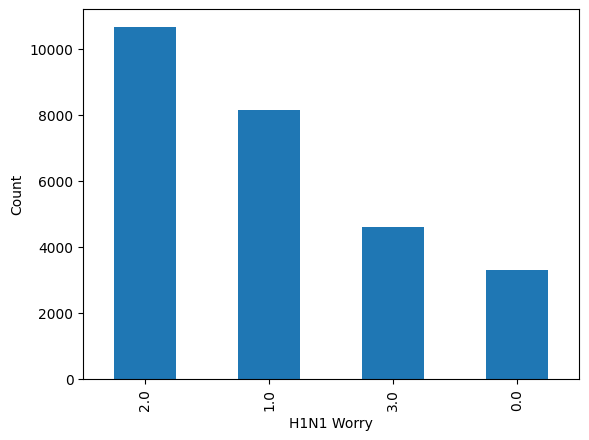

In [83]:
df['h1n1_worry'].value_counts().plot(kind = 'bar')
plt.xlabel('H1N1 Worry')
plt.ylabel('Count')
plt.show()

In [11]:
display(df['h1n1_worry'].mode(), df['h1n1_worry'].median())

0    2.0
Name: h1n1_worry, dtype: float64

2.0

In [12]:
# Filling 92 missing values by mode
df['h1n1_worry'].fillna(df['h1n1_worry'].mode()[0], inplace = True)


In [13]:
df['h1n1_awareness'].unique()

array([ 0.,  2.,  1., nan])

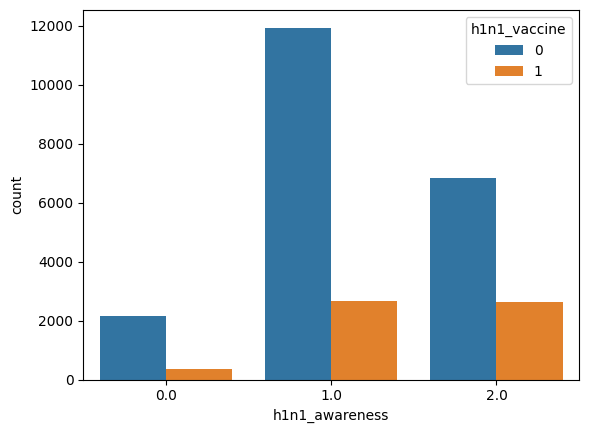

In [14]:
sns.countplot(x = 'h1n1_awareness', data = df, hue = 'h1n1_vaccine')
plt.show()

In [15]:
df['h1n1_awareness'].mode()


0    1.0
Name: h1n1_awareness, dtype: float64

In [16]:
df['antiviral_medication'].unique()


array([ 0.,  1., nan])

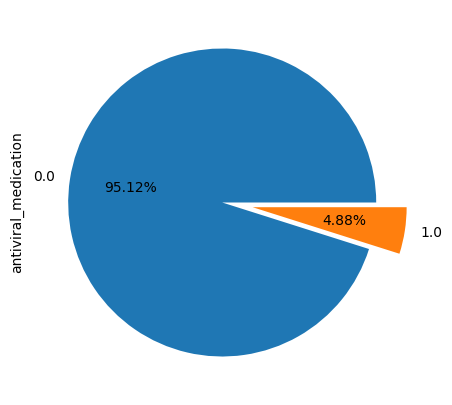

In [17]:
df['antiviral_medication'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.2])
plt.show()

In [18]:
df['contact_avoidance'].unique()

array([ 0.,  1., nan])

In [19]:
df['contact_avoidance'].value_counts()

1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64

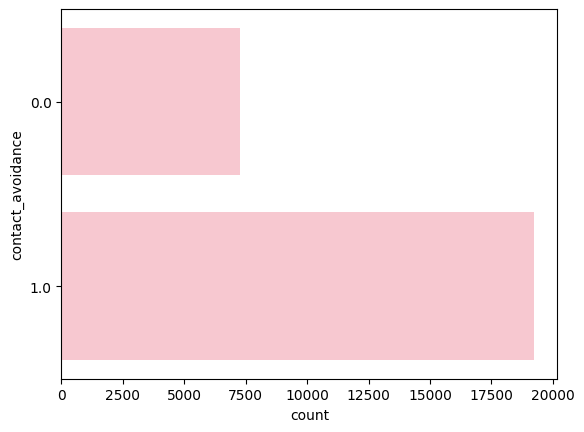

In [84]:
sns.countplot(y = 'contact_avoidance', data = df, color = 'pink')
plt.show()

In [21]:
df['bought_face_mask'].unique()

array([ 0.,  1., nan])

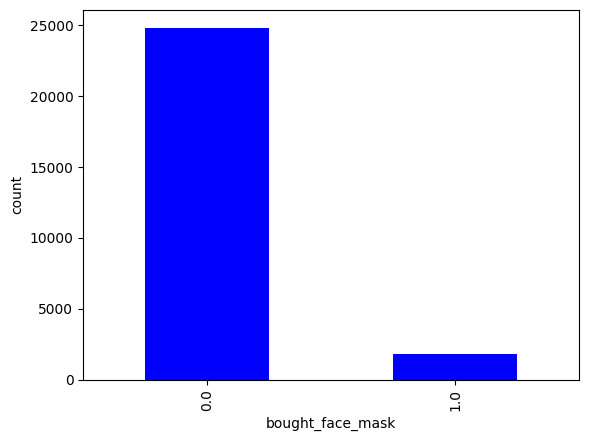

In [85]:
df['bought_face_mask'].value_counts().plot(kind = 'bar', color = 'blue')
plt.xlabel('bought_face_mask')
plt.ylabel('count')
plt.show()

In [23]:
df['wash_hands_frequently'].unique()

array([ 0.,  1., nan])

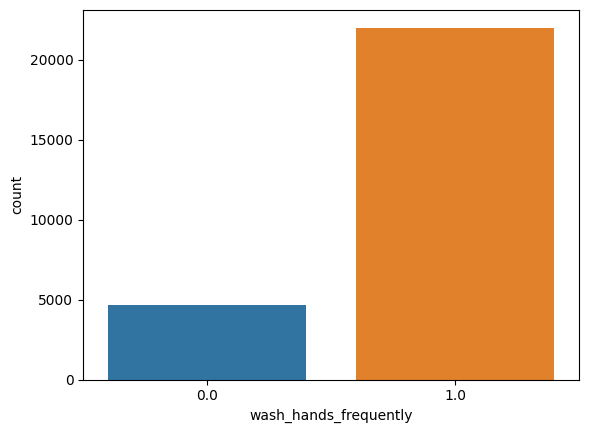

In [24]:
sns.countplot(x = 'wash_hands_frequently', data = df)
plt.show()

In [25]:
df['avoid_large_gatherings'].unique()
# 0=no, 1=yes
df['avoid_large_gatherings'].value_counts()


0.0    17073
1.0     9547
Name: avoid_large_gatherings, dtype: int64

In [26]:
df['reduced_outside_home_cont'].unique()
df['reduced_outside_home_cont'].value_counts()

0.0    17644
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

In [27]:
df['avoid_touch_face'].unique()
# 0=no, 1=yes

df['avoid_touch_face'].value_counts()

1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64

In [28]:
display(df['dr_recc_h1n1_vacc'].unique(), df['dr_recc_seasonal_vacc'].unique())
# 0=no, 1=yes



array([ 0., nan,  1.])

array([ 0., nan,  1.])

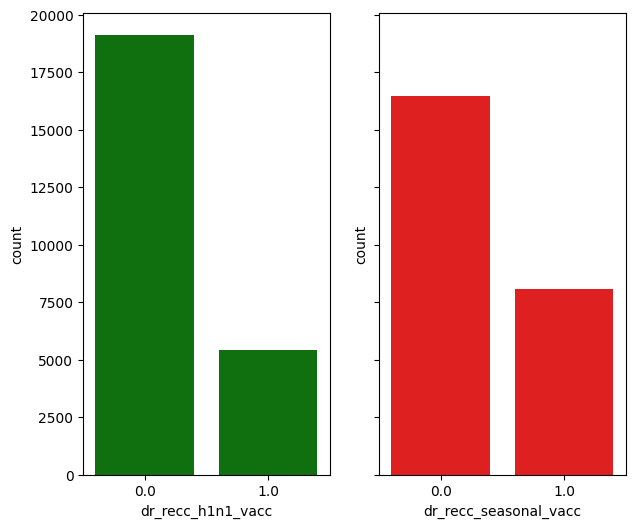

In [86]:
fig, ax = plt.subplots(1,2, figsize = [7,6], sharey = True )
sns.countplot(x = 'dr_recc_h1n1_vacc', data = df, color = 'green', ax=ax[0])
sns.countplot(x = 'dr_recc_seasonal_vacc', data = df, color = 'red', ax=ax[1])
plt.show()

<Axes: >

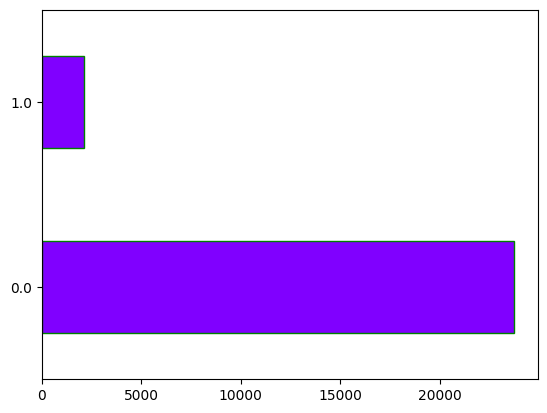

In [30]:
df['chronic_medic_condition'].value_counts()
df['cont_child_undr_6_mnths'].value_counts().plot(kind = 'barh', cmap = 'rainbow', edgecolor = 'green')

In [31]:
df['is_health_worker'].value_counts()


0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64

<Axes: >

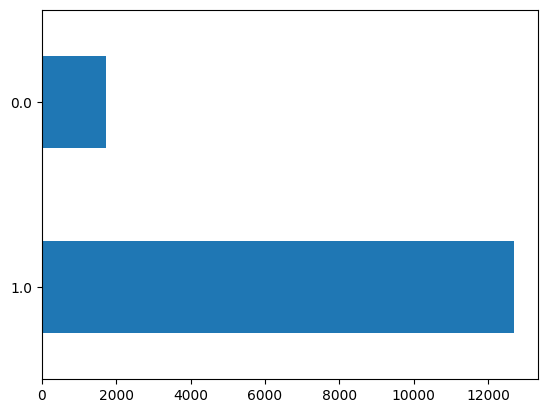

In [32]:
df['has_health_insur'].unique()
# 0=no, 1=yes
df['has_health_insur'].value_counts().plot(kind = 'barh')

<Axes: >

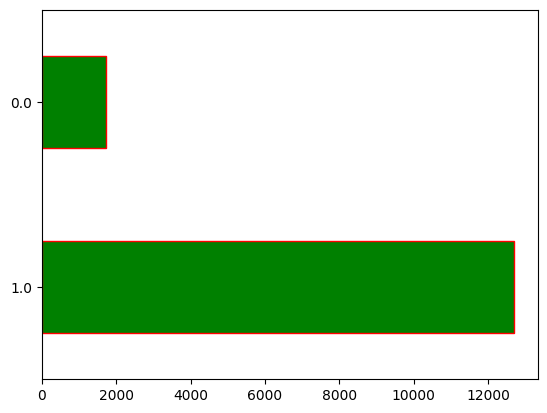

In [90]:
df['has_health_insur'].value_counts().plot(kind = 'barh', color = 'g', edgecolor = 'r')

In [34]:
display(df['is_h1n1_vacc_effective'].unique(), df['is_seas_vacc_effective'].unique())
# 1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 
# 4=Thinks it is somewhat effective, 5=Thinks it is highly effective



array([ 3.,  5.,  4.,  2.,  1., nan])

array([ 2.,  4.,  5.,  3.,  1., nan])

Text(0.5, 1.0, 'is_seas_vacc_effective')

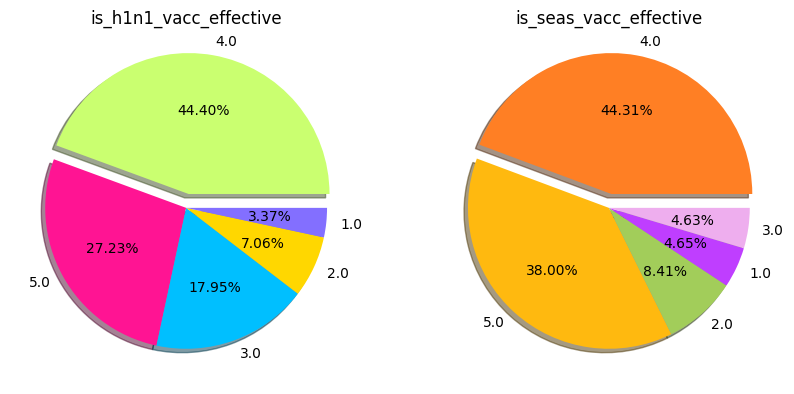

In [35]:
colors = ['#CAFF70', '#FF1493', '#00BFFF', '#FFD700', '#836FFF']
colors1 = ['#FF7F24', '#FFB90F', '#A2CD5A', '#BF3EFF', '#EEAEEE']
fig, (ax1,ax2) = plt.subplots(1,2, figsize = [10,10])

ax1.pie(df['is_h1n1_vacc_effective'].value_counts(), labels = df['is_h1n1_vacc_effective'].value_counts().index , 
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], colors = colors, shadow = True)

ax2.pie(df['is_seas_vacc_effective'].value_counts(), labels = df['is_seas_vacc_effective'].value_counts().index , 
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], colors = colors1, shadow = True)

ax1.set_title('is_h1n1_vacc_effective')
ax2.set_title('is_seas_vacc_effective')

In [36]:
display(df['is_h1n1_risky'].unique(), df['is_seas_risky'].unique())
# 1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=don’t know if it is risky or not, 
# 4=Thinks it is a somewhat high risk, 5=Thinks it is very highly risky



array([ 1.,  4.,  3.,  2.,  5., nan])

array([ 1.,  2.,  4.,  3.,  5., nan])

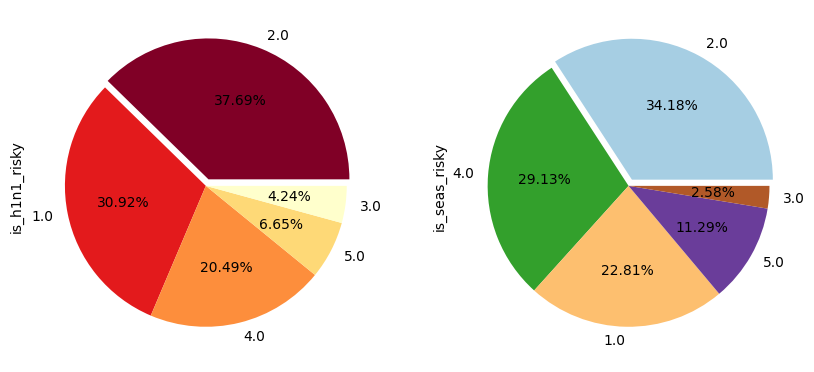

In [37]:
fig, ax = plt.subplots(1, 2, figsize = [10,10])
df['is_h1n1_risky'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'YlOrRd_r', ax = ax[0])
df['is_seas_risky'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'Paired', ax = ax[1])
plt.show()

In [38]:
display(df['sick_from_h1n1_vacc'].unique(), df['sick_from_seas_vacc'].unique())
# 1=Respondent not worried at all, 2=Respondent is not very worried, 3=Doesn't know, 4=Respondent is somewhat worried, 
# 5Respondent is very worried




array([ 2.,  4.,  1.,  5.,  3., nan])

array([ 2.,  4.,  1.,  5., nan,  3.])

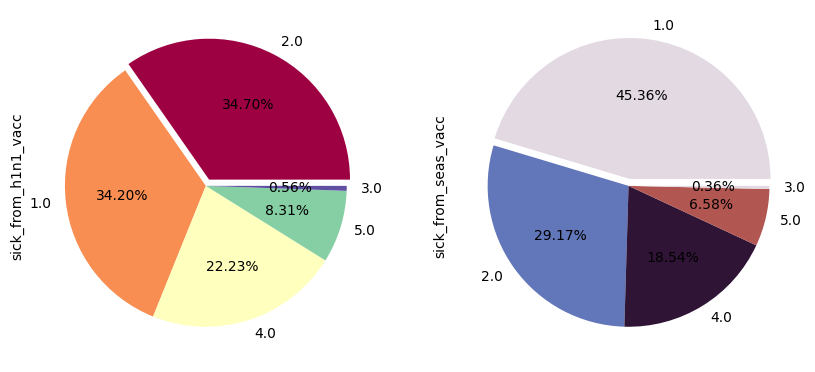

In [39]:
fig, ax = plt.subplots(1,2, figsize = [10,10])
df['sick_from_h1n1_vacc'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'Spectral', ax = ax[0])
df['sick_from_seas_vacc'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'twilight', ax = ax[1])
plt.show()

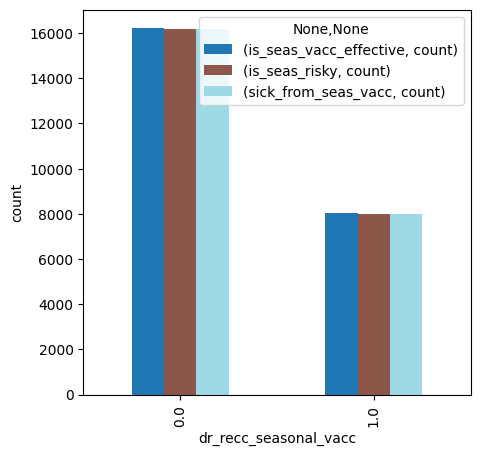

In [92]:
df.groupby(['dr_recc_seasonal_vacc']).agg({'is_seas_vacc_effective' : ['count'],
                                      'is_seas_risky' :['count'],
                                      'sick_from_seas_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20', figsize = [5,5])
plt.ylabel('count')
plt.show()

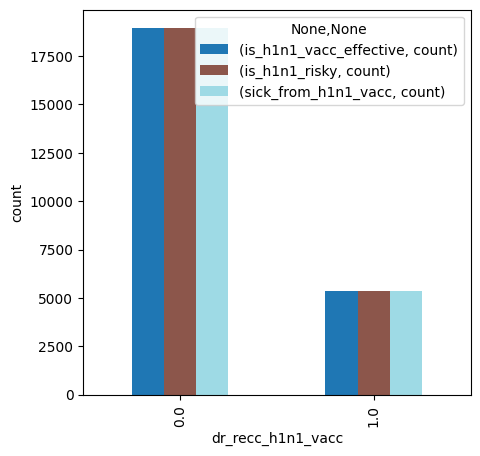

In [41]:
df.groupby(['dr_recc_h1n1_vacc']).agg({'is_h1n1_vacc_effective' : ['count'],
                                      'is_h1n1_risky' :['count'],
                                      'sick_from_h1n1_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20', figsize = [5,5])
plt.ylabel('count')
plt.show()

In [42]:
df['qualification'].unique()



array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [43]:
df['qualification'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

<Axes: >

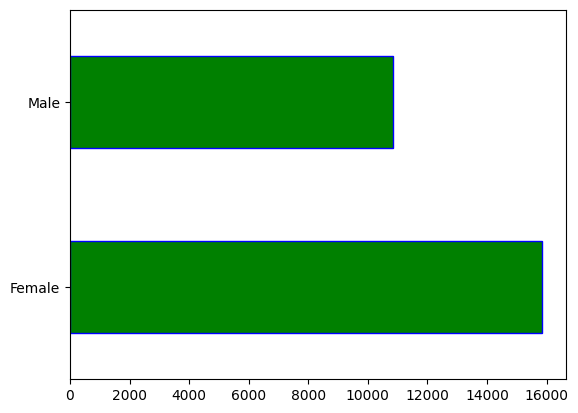

In [44]:
df['sex'].value_counts().plot(kind = 'barh', color = 'g', edgecolor = 'b')
# no nan values

In [45]:
df['income_level'].unique()


array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

<Axes: ylabel='income_level'>

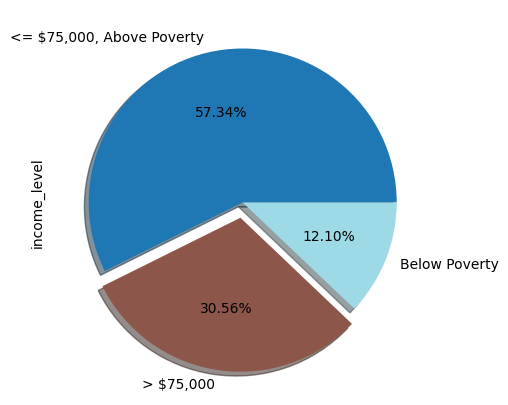

In [91]:

df['income_level'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', cmap = 'tab20',
                                            explode = [0,0.1,0], figsize = [5,5], shadow = True)

In [47]:
df['marital_status'].unique()



array(['Not Married', 'Married', nan], dtype=object)

In [48]:
df['marital_status'].value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [49]:
df['housing_status'].unique()

array(['Own', 'Rent', nan], dtype=object)

<Axes: >

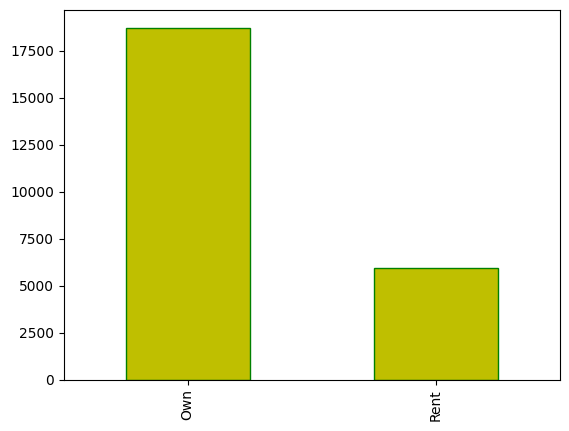

In [50]:
df['housing_status'].value_counts().plot(kind = 'bar', color = 'y', edgecolor = 'g')

In [51]:
df['employment'].unique()



array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

<Axes: ylabel='employment'>

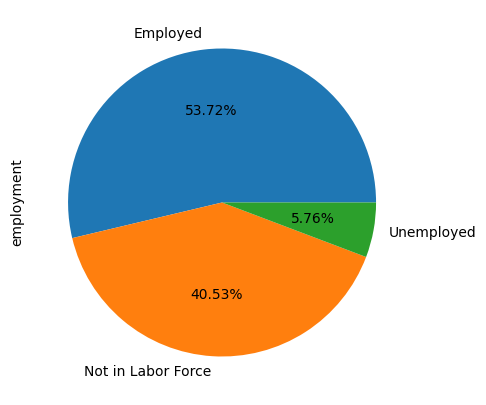

In [52]:
df['employment'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5])

In [53]:
display(df['no_of_adults'].unique(), df['no_of_children'].unique())



array([ 0.,  2.,  1.,  3., nan])

array([ 0.,  3.,  2.,  1., nan])

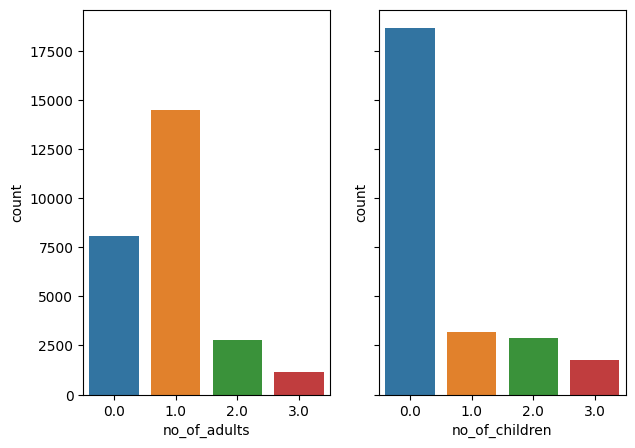

In [54]:
fig, ax = plt.subplots(1,2, figsize = [7,5], sharey = True)
sns.countplot( x = 'no_of_adults', data = df, ax = ax[0])
sns.countplot( x = 'no_of_children', data = df, ax = ax[1])
plt.show()

In [55]:
df['age_bracket'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

In [56]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [57]:
df1= df.astype({'h1n1_worry' : str, 'h1n1_awareness': str, 'antiviral_medication': str,
       'contact_avoidance': str, 'bought_face_mask': str, 'wash_hands_frequently': str,
       'avoid_large_gatherings': str, 'reduced_outside_home_cont': str,
       'avoid_touch_face': str, 'dr_recc_h1n1_vacc': str, 'dr_recc_seasonal_vacc': str,
       'chronic_medic_condition': str, 'cont_child_undr_6_mnths': str,
       'is_health_worker': str, 'has_health_insur': str, 'is_h1n1_vacc_effective': str,
       'is_h1n1_risky': str, 'sick_from_h1n1_vacc': str, 'is_seas_vacc_effective': str, 'age_bracket' : str,
       'is_seas_risky': str, 'sick_from_seas_vacc': str, 'no_of_adults' : str, 'no_of_children' : str,
        'h1n1_vaccine' : str})
df1.dtypes.value_counts()

object    33
int64      1
dtype: int64

In [58]:
df_dummy = pd.get_dummies(df1, drop_first= True )

In [59]:
df_dummy.shape


(26707, 91)

In [60]:
df_dummy['h1n1_vaccine_1'].value_counts(normalize = True)

0    0.787546
1    0.212454
Name: h1n1_vaccine_1, dtype: float64

In [61]:
y=df_dummy['h1n1_vaccine_1']
x=df_dummy.drop(['h1n1_vaccine_1'], axis=1)

In [62]:
x_train, x_test, y_train , y_test=train_test_split(x,y, test_size=.25, random_state=88)

In [63]:
log = LogisticRegression()

log.fit(x_train,y_train)

print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

Training Score : 0.8350474288567149
Testing Score : 0.8247716040137787


**Model Evaluation**

In [64]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [65]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,15010,794
Act_1,2510,1716


In [66]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15804
           1       0.68      0.41      0.51      4226

    accuracy                           0.84     20030
   macro avg       0.77      0.68      0.71     20030
weighted avg       0.82      0.84      0.82     20030



In [67]:
cnfTest=pd.DataFrame(metrics.confusion_matrix(y_test , pred_test), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTest

,Pred_0,Pred_1
Act_0,4969,260
Act_1,910,538


In [68]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      5229
           1       0.67      0.37      0.48      1448

    accuracy                           0.82      6677
   macro avg       0.76      0.66      0.69      6677
weighted avg       0.81      0.82      0.80      6677



In [69]:
pd.DataFrame(log.predict_proba(x_train), columns=["Prob_0", "Prob_1"])

,Prob_0,Prob_1
0,0.896395,0.103605
1,0.901230,0.098770
2,0.444590,0.555410
3,0.944679,0.055321
4,0.509171,0.490829
...,...,...
20025,0.831014,0.168986
20026,0.835607,0.164393
20027,0.718300,0.281700
20028,0.834017,0.165983


In [70]:
x_train1=x_train.copy()

x_train1["Actual_Default"]=y_train
x_train1["Prob_Default"]=log.predict_proba(x_train)[:, 1]

x_train1

,unique_id,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,h1n1_awareness_nan,antiviral_medication_1.0,antiviral_medication_nan,contact_avoidance_1.0,...,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_adults_nan,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,no_of_children_nan,Actual_Default,Prob_Default
9353,9353,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0.103605
6317,6317,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0.098770
13542,13542,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.555410
23986,23986,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.055321
16025,16025,1,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0.490829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24938,24938,0,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0.168986
2481,2481,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.164393
4047,4047,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0.281700
6432,6432,1,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0.165983


In [71]:
 #Decile Analysis
def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile

In [72]:
newtrain_pred=np.where(log.predict_proba(x_train)[:,1] > 0.232280104, 1, 0) # based on KS value

In [73]:
cnfNewTrain=pd.DataFrame(metrics.confusion_matrix(y_train , newtrain_pred), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfNewTrain

,Pred_0,Pred_1
Act_0,12219,3585
Act_1,1219,3007


In [74]:
print(metrics.classification_report(y_train , newtrain_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84     15804
           1       0.46      0.71      0.56      4226

    accuracy                           0.76     20030
   macro avg       0.68      0.74      0.70     20030
weighted avg       0.81      0.76      0.78     20030



In [75]:
newtest_pred=np.where(log.predict_proba(x_test)[:,1] > 0.229209326, 1, 0) # based on KS value

In [76]:
cnfNewTest=pd.DataFrame(metrics.confusion_matrix(y_test , newtest_pred), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfNewTest

,Pred_0,Pred_1
Act_0,3998,1231
Act_1,469,979


In [77]:
print(metrics.classification_report(y_test , newtest_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      5229
           1       0.44      0.68      0.54      1448

    accuracy                           0.75      6677
   macro avg       0.67      0.72      0.68      6677
weighted avg       0.80      0.75      0.76      6677



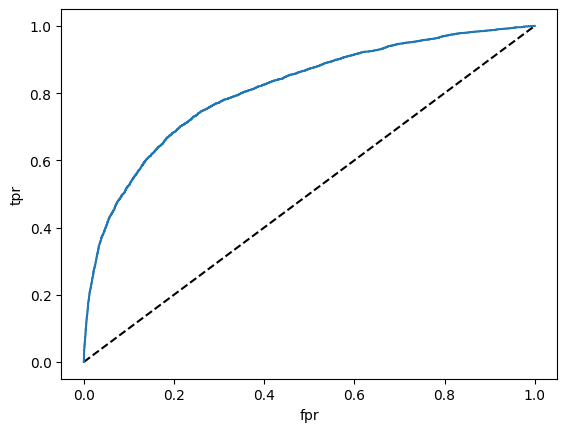

In [78]:
probs=log.predict_proba(x_train)[:,1]

fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [79]:
metrics.roc_auc_score(y_train,probs)

0.8121288912701656

In [80]:
model_report = pd.DataFrame()

tmp = pd.Series({'Model': " Logical Regression ",
                 'ROC Score' : metrics.roc_auc_score(y_test, newtest_pred),
                 'Precision Score': metrics.precision_score(y_test, newtest_pred),
                 'Recall Score': metrics.recall_score(y_test, newtest_pred),
                 'F1 Score' : metrics.f1_score(y_test, newtest_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, newtest_pred)})

model_logR_report = model_report.append(tmp, ignore_index = True)
model_logR_report

<ipython-input-80-2e07f48b8601>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_logR_report = model_report.append(tmp, ignore_index = True)


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Logical Regression,0.720344,0.442986,0.676105,0.535265,0.745395


### In this case, Recall Score is important as we dont want to miss out on people who actually need a h1n1 vaccine shot.